In [42]:
# !pip install requests

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv('data/psei_data.csv')

# Data Description

- c: closing price
- h: high price
- l: low price
- o: opening price
- t: date
- v: trading volume
- y: year
- m: month
- d: day
- w: week number
- w: dday of week number
- last: last price
- changeprice: change from last to close
- pchangepercent: price change from last to close
- symbol: stock symbol

In [4]:
data.head()

,c,h,l,o,t,v,y,m,d,w,wd,last,change,pchange,symbol
0,1.66,1.66,1.66,1.66,2006-04-03,250000.0,2006,4,3,14,0,1.66,0.00,0.000000,2GO
1,1.64,1.64,1.64,1.64,2006-04-04,13000.0,2006,4,4,14,1,1.66,-0.02,-0.012048,2GO
2,1.64,1.64,1.60,1.60,2006-04-12,320000.0,2006,4,12,15,2,1.64,0.00,0.000000,2GO
3,1.68,1.68,1.68,1.68,2006-04-20,1000.0,2006,4,20,16,3,1.64,0.04,0.024390,2GO
4,1.68,1.68,1.68,1.68,2006-04-21,3000.0,2006,4,21,16,4,1.68,0.00,0.000000,2GO


In [5]:
data.symbol.unique()

array(['2GO', 'AAA', 'AB', 'ABA', 'ABG', 'ABS', 'ABSP', 'AC', 'ACE',
       'ACPA', 'ACPB2', 'ACR', 'AEV', 'AGI', 'ALCO', 'ALHI', 'ALI', 'ANI',
       'ANS', 'AP', 'APC', 'APL', 'APO', 'APX', 'AR', 'ARA', 'AT', 'ATI',
       'ATN', 'ATNB', 'AUB', 'BC', 'BCB', 'BCOR', 'BDO', 'BEL', 'BHI',
       'BKR', 'BLFI', 'BLOOM', 'BMM', 'BPI', 'BRN', 'BSC', 'CA', 'CAT',
       'CDC', 'CEB', 'CEI', 'CEU', 'CHI', 'CHIB', 'CHP', 'CIC', 'CIP',
       'CNPF', 'COAL', 'COL', 'COSCO', 'CPG', 'CPM', 'CPV', 'CPVB',
       'CROWN', 'CSB', 'CYBR', 'DAVIN', 'DD', 'DDPR', 'DFNN', 'DIZ',
       'DMC', 'DMPL', 'DNA', 'DNL', 'DWC', 'ECP', 'EDC', 'EEI', 'EG',
       'ELI', 'EMP', 'EURO', 'EVER', 'EW', 'FAF', 'FDC', 'FEU', 'FFI',
       'FGEN', 'FGENF', 'FGENG', 'FJP', 'FLI', 'FMETF', 'FNI', 'FOOD',
       'FPH', 'FPHP', 'FPI', 'GEO', 'GERI', 'GLO', 'GLOPP', 'GMA7',
       'GMAP', 'GPH', 'GREEN', 'GSMI', 'GTCAP', 'H2O', 'HI', 'HLCM',
       'HOUSE', 'HVN', 'I', 'ICT', 'IDC', 'IMI', 'IMP', 'ION', 'IPM',
       'IPO'

In [6]:
# Set datetime to proper data type
data['datetime'] = pd.to_datetime(data['t'])

# Set date as index
data.index = data['datetime']

In [7]:
data.dtypes

c                  float64
h                  float64
l                  float64
o                  float64
t                   object
v                  float64
y                    int64
m                    int64
d                    int64
w                    int64
wd                   int64
last               float64
change             float64
pchange            float64
symbol              object
datetime    datetime64[ns]
dtype: object

In [8]:
data['datetime'].min(), data['datetime'].max()

(Timestamp('1983-01-03 00:00:00'), Timestamp('2018-02-19 00:00:00'))

### Pick a Random Stock

In [9]:
data.head(1)

,c,h,l,o,t,v,y,m,d,w,wd,last,change,pchange,symbol,datetime
datetime,,,,,,,,,,,,,,,,
2006-04-03,1.66,1.66,1.66,1.66,2006-04-03,250000.0,2006,4,3,14,0,1.66,0.0,0.0,2GO,2006-04-03


In [39]:
stock = 'AEV'
date_from = '2015'
date_to = '2018'

In [40]:
ubp_data = data[data['symbol']==stock][date_from:date_to].sort_index()[['c','last']]

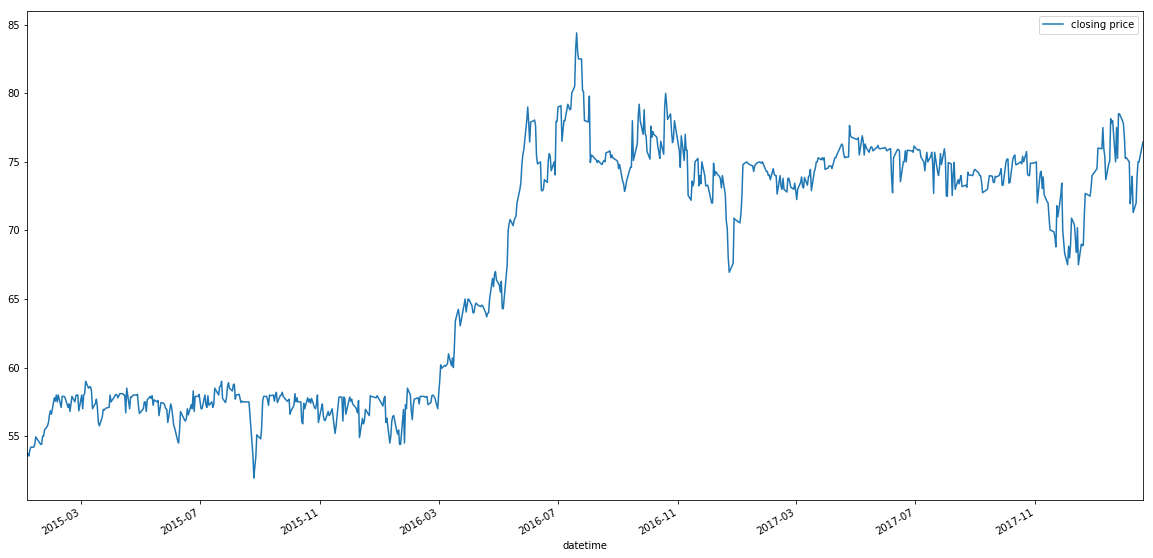

In [41]:
plt.subplots(figsize=(20, 10))
ubp_data.c.plot(label='closing price')
plt.legend()

### 20-EMA and 50-EMA on BPI Data

These smoothing functions are more commonly used as indicators for buy and sell.

In [42]:
# Calculate EMAs
ubp_data['ema_20'] = ubp_data['c'].ewm(span=20, min_periods=0, adjust=False, ignore_na=False).mean()
ubp_data['ema_50'] = ubp_data['c'].ewm(span=50, min_periods=0, adjust=False, ignore_na=False).mean()

# Calculate Derivative of EMAS
ubp_data['dema_20'] = ubp_data['ema_20'].diff()
ubp_data['dema_50'] = ubp_data['ema_50'].diff()

In [43]:
ubp_data.head()

,c,last,ema_20,ema_50,dema_20,dema_50
datetime,,,,,,
2015-01-05,53.65,52.70,53.650000,53.650000,NaN,NaN
2015-01-06,53.75,53.65,53.659524,53.653922,0.009524,0.003922
2015-01-07,53.55,53.75,53.649093,53.649846,-0.010431,-0.004075
2015-01-08,54.00,53.55,53.682513,53.663578,0.033420,0.013732
2015-01-09,54.20,54.00,53.731797,53.684614,0.049285,0.021036


# UBP Closing Prices with EMA Indicators

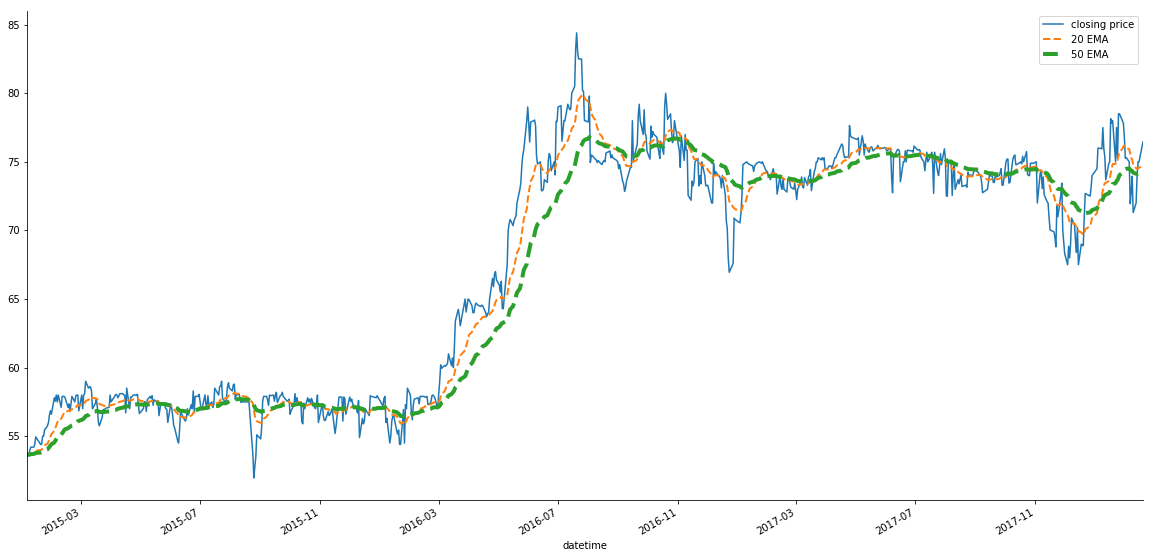

In [44]:
ax = plt.subplot()
ax = ubp_data.c.plot(label='closing price', figsize=(20, 10))
ubp_data.ema_20.plot(label='20 EMA', style='--', linewidth=2, ax=ax)
ubp_data.ema_50.plot(label='50 EMA', style='--', linewidth=4,  ax=ax)
plt.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

Generally: 
- if the larger EMA crosses above the smaller EMA, this signals a buy.
- if the larger EMA crosses below the smaller EMA, this signals a sell.

### Extract Crossing Instances

These instances indicate when we should buy or sell.

In [48]:
previous_20 = ubp_data['ema_20'].shift(1)
previous_50 = ubp_data['ema_50'].shift(1)
crossing_sell = ((ubp_data['ema_20'] <= ubp_data['ema_50']) & (previous_20 >= previous_50))
crossing_buy =  ((ubp_data['ema_20'] >= ubp_data['ema_50']) & (previous_20 <= previous_50))

In [53]:
# Buy Dates
buy_dates = ubp_data.loc[crossing_buy]
buy_dates['signal'] = 'buy'
buy_dates

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,c,last,ema_20,ema_50,dema_20,dema_50,signal
datetime,,,,,,,
2015-01-06,53.75,53.65,53.659524,53.653922,0.009524,0.003922,buy
2015-01-08,54.00,53.55,53.682513,53.663578,0.033420,0.013732,buy
2015-06-30,58.05,57.90,57.045651,56.987796,0.105721,0.043355,buy
2015-09-16,58.00,57.55,57.113525,57.100439,0.093313,0.036717,buy
2015-10-19,57.80,57.00,57.262018,57.258891,0.056630,0.022086,buy
2015-12-03,57.70,57.55,57.129897,57.104004,0.060011,0.024326,buy
2015-12-10,57.60,56.70,57.135538,57.110739,0.048891,0.019970,buy
2015-12-28,57.80,57.90,57.019698,57.012142,0.082137,0.032157,buy
2016-02-05,57.70,57.25,56.666983,56.662348,0.108739,0.042353,buy


In [54]:
# Sell Dates
sell_dates = ubp_data.loc[crossing_sell]
sell_dates['signal'] = 'sell'
sell_dates

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,c,last,ema_20,ema_50,dema_20,dema_50,signal
datetime,,,,,,,
2015-01-07,53.55,53.75,53.649093,53.649846,-0.010431,-0.004075,sell
2015-05-29,56.00,56.95,57.193515,57.263240,-0.125633,-0.051561,sell
2015-08-24,53.65,57.50,57.384328,57.498055,-0.393087,-0.157063,sell
2015-10-14,55.90,56.05,57.208798,57.240204,-0.137768,-0.054702,sell
2015-10-30,56.00,58.00,57.245819,57.264680,-0.131139,-0.051620,sell
2015-12-09,56.70,56.95,57.086648,57.090769,-0.040700,-0.015950,sell
2015-12-11,54.90,57.60,56.922630,57.024043,-0.212908,-0.086696,sell
2016-01-11,54.50,56.30,56.805927,56.940654,-0.242729,-0.099619,sell
2016-08-26,75.30,75.50,75.992805,76.019951,-0.072927,-0.029386,sell


In [56]:
pd.concat([buy_dates, sell_dates]).sort_index()

,c,last,ema_20,ema_50,dema_20,dema_50,signal
datetime,,,,,,,
2015-01-06,53.75,53.65,53.659524,53.653922,0.009524,0.003922,buy
2015-01-07,53.55,53.75,53.649093,53.649846,-0.010431,-0.004075,sell
2015-01-08,54.00,53.55,53.682513,53.663578,0.033420,0.013732,buy
2015-05-29,56.00,56.95,57.193515,57.263240,-0.125633,-0.051561,sell
2015-06-30,58.05,57.90,57.045651,56.987796,0.105721,0.043355,buy
2015-08-24,53.65,57.50,57.384328,57.498055,-0.393087,-0.157063,sell
2015-09-16,58.00,57.55,57.113525,57.100439,0.093313,0.036717,buy
2015-10-14,55.90,56.05,57.208798,57.240204,-0.137768,-0.054702,sell
2015-10-19,57.80,57.00,57.262018,57.258891,0.056630,0.022086,buy
